<a href="https://colab.research.google.com/github/reagenhuskey/cs290/blob/main/notebooks/premierLeagueProjectFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is not a test addition

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
url = "https://github.com/michaeledge27/CSCI290/raw/main/data/matches.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [ ]:
df['win'] = (df['result']=='W') * 1
df['win'].head()

,win
0,1
1,0
2,0
3,1
4,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team', 'win'],
      dtype='object')

In [ ]:
features = df.columns[df.columns != 'win']
features

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [ ]:
df['win'].unique()

array([1, 0])

In [ ]:
df.nunique()

,0
Unnamed: 0,182
date,610
time,41
comp,1
round,38
day,7
venue,2
result,3
gf,10
ga,10


In [ ]:
columnsToDrop = [col for col in['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'captain', 'referee', 'match report', 'notes', 'season', 'team']]

In [ ]:
betterDf = df.drop(columnsToDrop, axis = 1)
betterDf.head()

,gf,ga,opponent,xg,xga,poss,attendance,formation,sh,sot,dist,fk,pk,pkatt,win
0,3,1,Wolves,1.9,0.6,65,NaN,4-2-3-1,13,8,21.1,2,1,1,1
1,2,5,Leicester City,0.9,2.9,72,NaN,4-2-3-1,16,5,19.8,1,0,0,0
2,1,1,Leeds United,1.2,2.4,49,NaN,4-3-3,23,1,18.2,1,0,0,0
3,1,0,Arsenal,1.3,0.9,58,NaN,3-1-4-2,13,5,17.7,0,0,0,1
4,1,1,West Ham,1.0,0.3,69,NaN,4-3-3,14,7,20.9,1,0,0,0


In [ ]:
betterDf.nunique()

,0
gf,10
ga,10
opponent,26
xg,51
xga,51
poss,65
attendance,1344
formation,22
sh,35
sot,16


In [ ]:
target = 'win'
attribute = 'gf'

In [ ]:
uniqueVals = df[attribute].unique()
uniqueVals

array([3, 2, 1, 0, 5, 4, 6, 9, 7, 8])

In [ ]:
props = df[df[attribute] == uniqueVals[2]][target].value_counts(normalize = True)
props

,proportion
win,
0,0.750811
1,0.249189


In [ ]:
entropy = 0
props.array

<NumpyExtensionArray>
[0.7508111615833875, 0.2491888384166126]
Length: 2, dtype: float64

In [ ]:
for p in props:
  entropy = 0
  entropy = entropy - p*math.log2(p)


# Attribute selection method


In [ ]:
def categorical_entropy(df, target, feature):
  entropyList = []
  uniqueVals = df[feature].unique()
  overall = len(df)
  for val in uniqueVals:
    entropy = 0
    subset_size = len(df[ df[attribute] == val ])
    weight = subset_size / overall
    props = df[ df[attribute] == val ][target].value_counts( normalize=True )
    for p in props:
      entropy =  0 - weight*(p*math.log2(p))
      entropyList.append(entropy)
  return min(entropyList)

In [ ]:
def categorical_gini(df, target, feature):
  giniList = []
  uniqueVals = df[feature].unique()
  uniqueVals.sort()
  overall = len(df)
  for val in uniqueVals:
    gini = 0
    subset_size = len(df[ df[attribute] == val ])
    weight = subset_size / overall
    props = df[ df[attribute] == val ][target].value_counts( normalize=True )
    for p in props:
      gini =  1 - (weight * np.sum(np.square(p)))
      giniList.append(gini)
  return min(giniList)

In [ ]:
def quantitative_entropy(df, target, feature):
  entropyList = []
  splitPoints = []
  uniqueVals = df[feature].unique()
  overall = len(df)
  for val in uniqueVals:
    entropy = 0
    left = df[ df[feature] <= val ][ [feature,target] ]
    props = left[ target ].value_counts( normalize = True )
    weight = len( left ) / overall
    for prop in props:
      entropy = entropy - weight*prop*math.log2( prop )
    right = df[ df[feature] > val ][ [feature,target] ]
    props = right[ target ].value_counts( normalize = True )
    weight = len( right ) / overall
    for prop in props:
      entropy = entropy - weight*prop*math.log2( prop )
      entropyList.append(entropy)
      splitPoints.append(val)
  min_entropy = np.min(entropyList)
  best_split = splitPoints[np.argmin(entropyList)]
  return min_entropy, best_split

In [ ]:
def quantitative_gini(df, target, feature):
  giniList = []
  splitPoints = []
  uniqueVals = df[feature].unique()
  uniqueVals.sort()
  overall = len(df)
  for val in uniqueVals:
    gini = 0
    left = df[ df[feature] <= val ][ [feature,target] ]
    props = left[ target ].value_counts( normalize = True )
    weight = len( left ) / overall
    for prop in props:
      gini =  1 - (weight * np.sum(np.square(prop)))
    right = df[ df[feature] > val ][ [feature,target] ]
    props = right[ target ].value_counts( normalize = True )
    weight = len( right ) / overall
    for prop in props:
      gini =  1 - (weight * np.sum(np.square(prop)))
      giniList.append(gini)
      splitPoints.append(val)
  min_gini = np.min(giniList)
  best_split = splitPoints[np.argmin(giniList)]
  return min_gini, best_split

In [ ]:
def isCategorical(feature):
  if df[feature].nunique() < 8:
    return True
  else:
    return False

In [ ]:
import itertools
# from stack exchange
def oneDArray(x):
    return list(itertools.chain(*x))

In [ ]:
def attribute_selection_method(df, target, measure):
  categoricalList = []
  categoricalFeatureList = []
  quantitativeList = []
  quantitativeFeatureList = []
  splitList = []
  features = df.columns.drop(target)
  for feature in features:
    if isCategorical(feature):
      print(feature)
      if measure == 'entropy':
        result1 = categorical_entropy(df, target, feature)
        categoricalList.append(result1)
        categoricalFeatureList.append(feature)
      elif measure == 'gini':
        result2 = categorical_gini(df, target, feature)
        categoricalList.append(result2)
        categoricalFeatureList.append(feature)
    elif not isCategorical(feature):
      if measure == 'entropy':
        min_entropy, best_split = quantitative_entropy(df, target, feature)
        quantitativeList.append(min_entropy)
        quantitativeFeatureList.append(feature)
        splitList.append(best_split)
      elif measure == 'gini':
        min_gini, best_split = quantitative_gini(df, target, feature)
        quantitativeList.append(min_gini)
        quantitativeFeatureList.append(feature)
        splitList.append(best_split)
  if min(categoricalList) <= min(quantitativeList):
    return categoricalFeatureList[np.argmin(categoricalList)]
  else:
    best_index = np.argmin(quantitativeList)
    return quantitativeFeatureList[best_index], splitList[best_index]


In [ ]:
attribute_selection_method(betterDf, 'win', 'gini')


fk
pk
pkatt


('ga', 0)

# Binary Classifier

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_set, test_set = train_test_split(df, test_size = 0.2, shuffle = True)

In [ ]:
train_set.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team', 'win'],
      dtype='object')

In [ ]:
colsInUse = ['date', 'time', 'comp', 'day', 'round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk', 'win']
colsInUseNotTarget = ['date', 'time', 'comp', 'day', 'round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk']

In [ ]:
train_set = train_set[colsInUse]

In [ ]:
test_set = test_set[colsInUse]

In [ ]:
X_train = train_set[colsInUseNotTarget]

y_train = train_set['win']

In [ ]:
X_test = test_set[colsInUseNotTarget]

y_test = test_set['win']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3830 entries, 3470 to 891
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3830 non-null   object 
 1   time    3830 non-null   object 
 2   comp    3830 non-null   object 
 3   day     3830 non-null   object 
 4   round   3830 non-null   object 
 5   venue   3830 non-null   object 
 6   xga     3830 non-null   float64
 7   poss    3830 non-null   int64  
 8   sot     3830 non-null   int64  
 9   fk      3830 non-null   int64  
 10  pk      3830 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 359.1+ KB


In [ ]:
num_attributes = X_train.select_dtypes(include = ['int64', 'float64']).columns
cat_attributes = X_train.select_dtypes(include = ['object']).columns

In [ ]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [ ]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier())])

In [ ]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.76762402, 0.76501305, 0.76240209, 0.75065274, 0.74543081])

In [ ]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['xga', 'poss', 'sot', 'fk', 'pk'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['date', 'time', 'comp', 'day', 'round', 'venue'], dtype='object'))])),
                ('clf', DecisionTreeClassifier())])

In [ ]:
predictions = pipeline.predict( X_test )

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix( y_test, predictions )
cm

array([[473,  92],
       [111, 282]])

In [ ]:
#plot_tree(pipeline.named_steps['clf']);

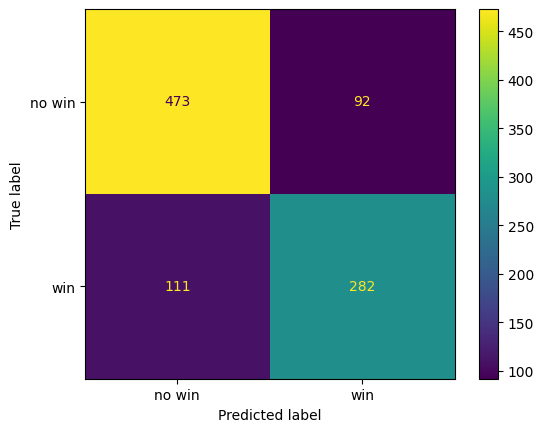

In [ ]:
ConfusionMatrixDisplay( cm, display_labels=["no win","win"]).plot()

In [ ]:
import sklearn.metrics as metrics


In [ ]:
old_recall = metrics.recall_score( y_test, predictions)
old_recall

0.544529262086514

In [ ]:
old_precision = metrics.precision_score( y_test, predictions)

In [ ]:
old_f1 = metrics.f1_score( y_test, predictions)

In [ ]:
old_accuracy = metrics.accuracy_score( y_test, predictions)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'clf__max_leaf_nodes': list(range(2, 10)),
    'clf__max_depth': list(range(1, 7)),
    'clf__min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(pipeline,
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['xga', 'poss', 'sot', 'fk', 'pk'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['date', 'time', 'comp', 'day', 'round', 'venue'], dtype='object'))])),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__max_depth': [1, 2, 3, 4, 5, 6],
                         'clf__max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__min_samples_split': [2, 3, 4]})

In [ ]:
grid_search_cv.best_params_

{'clf__max_depth': 3, 'clf__max_leaf_nodes': 7, 'clf__min_samples_split': 2}

In [ ]:
grid_search_cv.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['xga', 'poss', 'sot', 'fk', 'pk'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['date', 'time', 'comp', 'day', 'round', 'venue'], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7))])

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.7254697286012526

In [ ]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train.iloc[mini_train_index]
    y_mini_train = y_train.iloc[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [ ]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.6771148225469729

In [ ]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7, min_samples_split=2))])

In [ ]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.74020888, 0.70104439, 0.71671018, 0.74281984, 0.71279373])

In [ ]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['xga', 'poss', 'sot', 'fk', 'pk'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['date', 'time', 'comp', 'day', 'round', 'venue'], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7))])

In [ ]:
predictions = pipeline.predict( X_test )

In [ ]:
cm = confusion_matrix( y_test, predictions )
cm

array([[481,  84],
       [179, 214]])

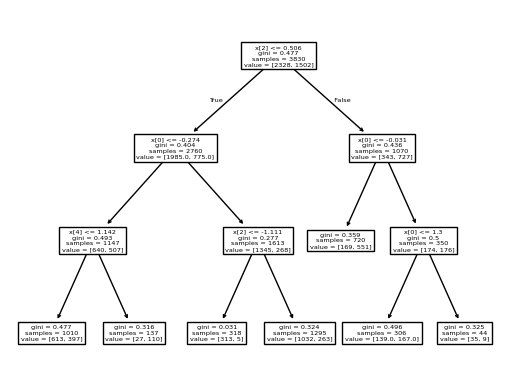

In [ ]:
plot_tree(pipeline.named_steps['clf']);

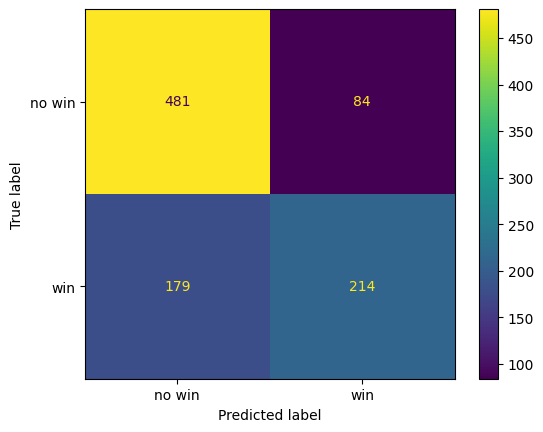

In [ ]:
ConfusionMatrixDisplay( cm, display_labels=["no win","win"]).plot()

In [ ]:
recall = metrics.recall_score( y_test, predictions)
precision = metrics.precision_score( y_test, predictions)
f1_score = metrics.f1_score( y_test, predictions)
accuracy = metrics.accuracy_score( y_test, predictions)

In [ ]:
print("recall: ", recall)
print("precision: ", precision)
print("f1_score: ", f1_score)
print("accuracy: ", accuracy)

recall:  0.544529262086514
precision:  0.7181208053691275
f1_score:  0.6193921852387844
accuracy:  0.7254697286012526


In [ ]:
print("old recall: ", old_recall)
print("old precision: ", old_precision)
print("old f1_score: ", old_f1)
print("old accuracy: ", old_accuracy)

old recall:  0.544529262086514
old precision:  0.7181208053691275
old f1_score:  0.6193921852387844
old accuracy:  0.7254697286012526
